# sub-n-classes, Tsallis Entropy labelling, looped

In [37]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
import time
from numpy.random import *
import itertools

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
def randints_nodup(k):
    ns = []
    while (len(ns) < k):
        n = randint(0, 10)
        if not n in ns:
            ns.append(n)
    return list(ns)

In [3]:
# entropy labelling
def tsallis_ent_label(q, probas, s_cls):
    elements = np.power(probas, q - 1)
    # thrshld in tsallis entropy model
    ts_thrshld = np.sum(np.power(probas, q))
    if q < 1:
        labels = np.array([s_cls[i] for i, e in enumerate(elements) if e <= ts_thrshld])
    else:
        labels = np.array([s_cls[i] for i, e in enumerate(elements) if e >= ts_thrshld])
    
    return labels

#### labelling and evaluating them

In [4]:
# labelling and evaluating them
def tsallis_ent_scls_eval(q, classes_num, orig_A, lim_A):

    s_cls = randints_nodup(classes_num)
    s_cls.sort()
    #print(s_cls)

    # extract dataset of chosen classes
    trn_imgs = [img for i, img in enumerate(train_imgs) if train_labels[i] in s_cls]
    trn_labels = [label for label in train_labels if label in s_cls]

    tst_imgs = [img for i, img in enumerate(test_imgs) if test_labels[i] in s_cls]
    tst_labels = [label for label in test_labels if label in s_cls]

    # generate an annotator
    a1_model = LR().fit(trn_imgs[:orig_A], trn_labels[:orig_A])
    a1_proba = a1_model.predict_proba(trn_imgs[orig_A:orig_A + lim_A])

    # entropy labelling
    mul_labels = [tsallis_ent_label(q, probas, s_cls) for probas in a1_proba]
    
    # labels score evaluation
    score = 0
    for labels, t_label in zip(mul_labels, trn_labels[orig_A:orig_A + lim_A]):
        for l in labels:
            if (l == t_label):
                score += 1

    m_labels = []
    for labels in mul_labels:
         [m_labels.append(l) for l in labels]                
                    
    return (len(m_labels)/lim_A, score*100/len(m_labels), score*100/lim_A) 

## MNIST

In [35]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_imgs = np.array([x.ravel() for x in train_images])
test_imgs = np.array([y.ravel() for y in test_images])

img_SIZE = train_images.shape[1]*train_images.shape[2]

### labels evalutaiton

In [39]:
orig_A1, lim_A1 = 2000, 2000
q = 0.5
mnist_evals = []
for j in range(2, 11):
    a, b, c = 0, 0, 0
    if j == 10:
        sample_lnum, sample_lqual, sample_lqual2 = tsallis_ent_scls_eval(q, j, orig_A1, lim_A1)
        mnist_evals.append((sample_lnum, sample_lqual, sample_lqual2))
    else:    
        for _ in range(10):
            sample_lnum, sample_lqual, sample_lqual2 = tsallis_ent_scls_eval(q, j, orig_A1, lim_A1)
            a += sample_lnum
            b += sample_lqual
            c += sample_lqual2
        mnist_evals.append((a/10, b/10, c/10))
print(f"evaluation of labels genereated for mnist; (# of labels per image, labels quality [%], lebels quality as groups [%])\n{mnist_evals}")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local

evaluation of labels genereated for mnist; (# of labels per image, labels quality [%], lebels quality as groups [%])
[(1.0, 97.705, 97.705), (1.0005, 95.32801007850189, 95.375), (1.0079500000000001, 94.36009729289526, 95.1), (1.0232500000000002, 90.66110061598138, 92.73499999999999), (1.0328, 88.37611070973315, 91.26), (1.0462, 85.03846410102354, 88.925), (1.05065, 84.66692983118716, 88.95), (1.0672000000000001, 81.98413934706917, 87.49000000000001), (1.0745, 80.64215914378781, 86.65)]


## CIFAR 10

In [13]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# number of data samples
train_N, test_N = train_images.shape[0], test_images.shape[0]
# data normalisation and vecotrise
train_imgs, test_imgs = train_images.reshape(train_N, -1)/255, test_images.reshape(test_N, -1)/255
# labels ravel
train_labels, test_labels = train_labels.ravel(), test_labels.ravel()

img_SIZE = train_images.shape[1]*train_images.shape[2]*train_images.shape[3]

### labels evalutaiton

In [8]:
orig_A2, lim_A2 = 2000, 2000
q = 3/2
cifar10_evals = []
for j in range(2, 11):
    a, b, c = 0, 0, 0
    if j == 10:
        sample_lnum, sample_lqual, sample_lqual2 = tsallis_ent_scls_eval(q, j, orig_A2, lim_A2)
        cifar10_evals.append((sample_lnum, sample_lqual, sample_lqual2))
    else:    
        for _ in range(10):
            sample_lnum, sample_lqual, sample_lqual2 = tsallis_ent_scls_eval(q, j, orig_A2, lim_A2)
            a += sample_lnum
            b += sample_lqual
            c += sample_lqual2
        cifar10_evals.append((a/10, b/10, c/10))
print(f"evaluation of labels genereated for cifar10; (# of labels per image, labels quality [%], lebels quality as groups [%])\n{cifar10_evals}")

evaluation of labels genereated for cifar10; (# of labels per image, labels quality [%], lebels quality as groups [%])
[(1.0, 78.24499999999999, 78.24499999999999), (1.0372499999999998, 60.0922117553636, 62.19500000000001), (1.0888000000000002, 52.546105159347725, 57.11), (1.1545, 44.307437685247876, 51.12), (1.20525, 39.55322829383922, 47.65), (1.2684, 34.36298459645821, 43.584999999999994), (1.3268999999999997, 30.80721330537512, 40.870000000000005), (1.37655, 27.715548538067765, 38.150000000000006), (1.4115, 26.071555083244775, 36.8)]


## CIFAR100

In [14]:
from keras.datasets import cifar100

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode = "fine")

# number of data samples
train_N, test_N = train_images.shape[0], test_images.shape[0]
# data normalisation and vecotrise
train_imgs, test_imgs = train_images.reshape(train_N, -1)/255, test_images.reshape(test_N, -1)/255
# labels ravel
train_labels, test_labels = train_labels.ravel(), test_labels.ravel()

img_SIZE = train_images.shape[1]*train_images.shape[2]*train_images.shape[3]

### labels evalutaiton

In [15]:
orig_A3, lim_A3 = 200, 200
q = 3/2
cifar100_evals = []
for j in range(2, 11):
    a, b, c = 0, 0, 0
    if j == 10:
        sample_lnum, sample_lqual, sample_lqual2 = tsallis_ent_scls_eval(q, j, orig_A3, lim_A3)
        cifar100_evals.append((sample_lnum, sample_lqual, sample_lqual2))
    else:    
        for _ in range(10):
            sample_lnum, sample_lqual, sample_lqual2 = tsallis_ent_scls_eval(q, j, orig_A3, lim_A3)
            a += sample_lnum
            b += sample_lqual
            c += sample_lqual2
        cifar100_evals.append((a/10, b/10, c/10))
print(f"evaluation of labels genereated for cifar100; (# of labels per image, labels quality [%], lebels quality as groups [%])\n{cifar100_evals}")

evaluation of labels genereated for cifar100; (# of labels per image, labels quality [%], lebels quality as groups [%])
[(1.0, 75.0, 75.0), (1.017, 60.25056739060599, 61.25), (1.0805, 53.52036013254544, 57.75), (1.1355, 45.261531662373024, 51.35), (1.2025, 38.57491714435389, 46.35), (1.2685, 34.58064583939547, 43.8), (1.2865, 33.03962271553248, 42.35), (1.3505, 26.780882914526387, 36.15), (1.365, 27.106227106227106, 37.0)]


#### Tsallis entropy based labellingの結果ベタ打ち

In [41]:
mnist_evals = [(1.0, 98.29499999999999, 98.29499999999999), (1.0002499999999999, 95.59151395081679, 95.615), (1.0058500000000001, 90.13900838291002, 90.66), (1.0080500000000001, 91.22951357420432, 91.96), (1.0152, 88.83585469795497, 90.18000000000002), (1.0198, 87.85993767683763, 89.595), (1.02665, 85.37827338993625, 87.65000000000002), (1.03605, 83.64809418463929, 86.66), (1.0455, 82.30511716881875, 86.05)]
mnist_evals2 = [(1.0, 97.705, 97.705), (1.0005, 95.32801007850189, 95.375), (1.0079500000000001, 94.36009729289526, 95.1), (1.0232500000000002, 90.66110061598138, 92.73499999999999), (1.0328, 88.37611070973315, 91.26), (1.0462, 85.03846410102354, 88.925), (1.05065, 84.66692983118716, 88.95), (1.0672000000000001, 81.98413934706917, 87.49000000000001), (1.0745, 80.64215914378781, 86.65)]
mnist_evals3 = [(1.0, 97.125, 97.125), (1.00015, 95.68123096496059, 95.695), (1.0032, 93.3396805529437, 93.635), (1.0117999999999998, 91.4094574675283, 92.465), (1.0135, 90.42965046212836, 91.64500000000001), (1.0262499999999999, 86.1597782160006, 88.405), (1.033, 84.68762375167877, 87.47), (1.04435, 82.98555657912873, 86.66), (1.0525, 82.04275534441805, 86.35)]
cifar10_evals = [(1.0, 78.24499999999999, 78.24499999999999), (1.0372499999999998, 60.0922117553636, 62.19500000000001), (1.0888000000000002, 52.546105159347725, 57.11), (1.1545, 44.307437685247876, 51.12), (1.20525, 39.55322829383922, 47.65), (1.2684, 34.36298459645821, 43.584999999999994), (1.3268999999999997, 30.80721330537512, 40.870000000000005), (1.37655, 27.715548538067765, 38.150000000000006), (1.4115, 26.071555083244775, 36.8)]
cifar100_evals = [(1.0, 75.0, 75.0), (1.017, 60.25056739060599, 61.25), (1.0805, 53.52036013254544, 57.75), (1.1355, 45.261531662373024, 51.35), (1.2025, 38.57491714435389, 46.35), (1.2685, 34.58064583939547, 43.8), (1.2865, 33.03962271553248, 42.35), (1.3505, 26.780882914526387, 36.15), (1.365, 27.106227106227106, 37.0)]

#### Shannon entropy based labellingの結果ベタ打ち

In [27]:
shannon_mnist_evals = [(0.9356500000000001, 97.59112842711961, 91.44), (1.00055, 95.09837104519026, 95.15), (1.0051999999999999, 92.11736652570067, 92.585), (1.0105, 91.63631865089286, 92.58500000000001), (1.0141499999999997, 90.18507482103416, 91.45), (1.0228, 87.52875104060001, 89.52000000000001), (1.0335999999999999, 85.03314578957648, 87.88499999999999), (1.04305, 83.77746449706856, 87.38), (1.0515, 82.1207798383262, 86.35)]
shannon_cifar10_evals = [(1.0, 74.75, 74.75), (1.0503, 59.12454317334923, 61.989999999999995), (1.1259000000000001, 52.07008511489069, 58.395), (1.21395, 44.659508244866444, 54.17), (1.2910499999999998, 38.921387720990715, 50.225), (1.37705, 33.05457607486076, 45.485), (1.45695, 30.184617088821017, 43.97), (1.53715, 26.949681416477638, 41.42), (1.573, 25.33375715193897, 39.85)]
shannon_cifar100_evals = [(1.0, 74.05, 74.05), (1.0544999999999998, 62.104241102486604, 65.35), (1.1214999999999997, 51.47451323040567, 57.7), (1.1934999999999998, 44.192441242368616, 52.65), (1.2449999999999997, 42.06936819425348, 52.25), (1.355, 32.95733722136263, 44.65), (1.4009999999999998, 30.70275968857884, 43.0), (1.4565000000000001, 26.245987142981033, 38.2), (1.505, 25.58139534883721, 38.5)]

#### 1/K based labellingの結果ベタ打ち

In [18]:
oneKth_mnist_evals = [(1.0, 98.535, 98.535), (1.0337999999999998, 93.474425718079, 96.59), (1.0581, 90.81419007456978, 96.01), (1.0956000000000001, 86.1299731028797, 94.28), (1.1239000000000001, 82.26485567364804, 92.39500000000001), (1.1456, 80.36772302436852, 91.985), (1.1787, 76.9199874518848, 90.645), (1.2041499999999998, 74.92200535609274, 90.2), (1.2255, 73.19461444308446, 89.7)]
oneKth_cifar10_evals = [(1.0, 74.89500000000001, 74.89500000000001), (1.2692, 55.37420648812955, 70.145), (1.49495, 45.74459316392563, 68.3), (1.6934, 39.62396687129409, 67.05499999999999), (1.9530999999999998, 32.21940547853991, 62.86), (2.1416, 28.74886685872645, 61.55), (2.3503999999999996, 25.600694800298573, 60.154999999999994), (2.5581, 22.96395128959202, 58.739999999999995), (2.712, 21.109882005899706, 57.25)]
oneKth_cifar100_evals = [(1.0, 77.2, 77.2), (1.24, 58.172364364922245, 72.0), (1.4460000000000002, 44.860119469499764, 64.75), (1.6415, 39.18608024073104, 64.2), (1.8370000000000002, 31.914771437344246, 58.5), (2.066, 28.362822089935, 58.5), (2.2589999999999995, 24.41651839267302, 55.15), (2.4054999999999995, 21.666044289564223, 52.1), (2.525, 20.594059405940595, 52.0)]

In [42]:
# Tsallis Entropy q = 1.5
lnum_mnist = [e[0] for e in mnist_evals]
lqual_mnist = [e[1] for e in mnist_evals]

lnum_cifar10 = [e[0] for e in cifar10_evals]
lqual_cifar10 = [e[1] for e in cifar10_evals]

lnum_cifar100 = [e[0] for e in cifar100_evals]
lqual_cifar100 = [e[1] for e in cifar100_evals]

# q = 0.5
lnum_mnist2 = [e[0] for e in mnist_evals2]
lqual_mnist2 = [e[1] for e in mnist_evals2]

# q = 0.99
lnum_mnist3 = [e[0] for e in mnist_evals3]
lqual_mnist3 = [e[1] for e in mnist_evals3]


# lnum_cifar102 = [e[0] for e in cifar10_evals]
# lqual_cifar102 = [e[1] for e in cifar10_evals]

# lnum_cifar100 = [e[0] for e in cifar100_evals]
# lqual_cifar100 = [e[1] for e in cifar100_evals]

# Shannon Entropy
lnum_mnist_shannon = [e[0] for e in shannon_mnist_evals]
lqual_mnist_shannon = [e[1] for e in shannon_mnist_evals]

lnum_cifar10_shannon = [e[0] for e in shannon_cifar10_evals]
lqual_cifar10_shannon = [e[1] for e in shannon_cifar10_evals]

lnum_cifar100_shannon = [e[0] for e in shannon_cifar100_evals]
lqual_cifar100_shannon = [e[1] for e in shannon_cifar100_evals]

#### labels acc

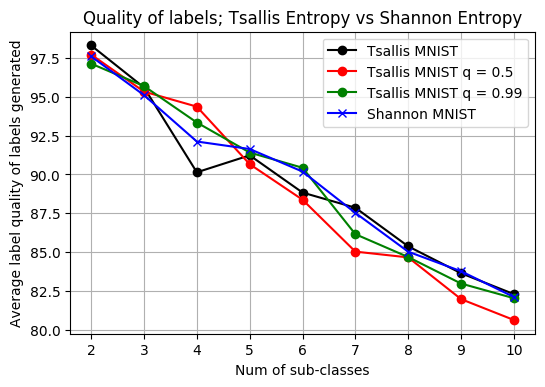

In [46]:
plt.figure(dpi = 100)
plt.title("Quality of labels; Tsallis Entropy vs Shannon Entropy")

# tsallis Entropy
plt.plot([i for i in range(2, 11)], lqual_mnist, marker = "o", color = "k", label = "Tsallis MNIST")
# plt.plot([i for i in range(2, 11)], lqual_cifar10, marker = "o", color = "r", label = "Tsallis CIFAR10")
# plt.plot([i for i in range(2, 11)], lqual_cifar100, marker = "o", color = "g", label = "Tsallis CIFAR100")
plt.plot([i for i in range(2, 11)], lqual_mnist2, marker = "o", color = "r", label = "Tsallis MNIST q = 0.5")
plt.plot([i for i in range(2, 11)], lqual_mnist3, marker = "o", color = "g", label = "Tsallis MNIST q = 0.99")

# shannon
plt.plot([i for i in range(2, 11)], lqual_mnist_shannon, marker = "x", color = "b", label = "Shannon MNIST")
# plt.plot([i for i in range(2, 11)], lqual_cifar10_shannon, marker = "x", color = "b", label = "Shannon CIFAR10")
# plt.plot([i for i in range(2, 11)], lqual_cifar100_shannon, marker = "x", color = "k", label = "Shannon CIFAR100")

plt.xlabel("Num of sub-classes")
plt.ylabel("Average label quality of labels generated")	
plt.legend(loc = "best")
plt.grid(True)
# plt.savefig("tsallis-vs-shannon_labels-acc.pdf")

#### ave num of labels

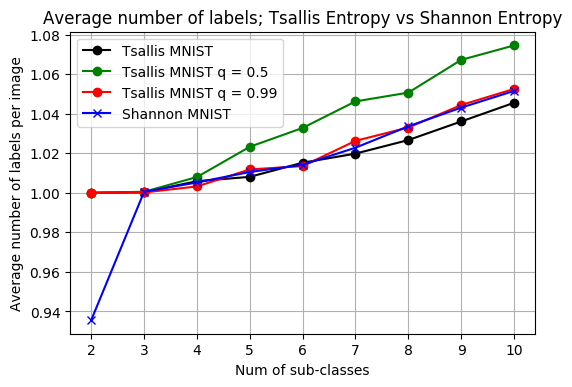

In [48]:
plt.figure(dpi = 100)
plt.title("Average number of labels; Tsallis Entropy vs Shannon Entropy")
# Tsallis Entropy
plt.plot([i for i in range(2, 11)], lnum_mnist, marker = "o", color = "k", label = "Tsallis MNIST")
# plt.plot([i for i in range(2, 11)], lnum_cifar10, marker = "o", color = "r", label = "Tsallis CIFAR10")
#plt.plot([i for i in range(2, 11)], lnum_cifar100, marker = "o", color = "g", label = "Tsallis CIFAR100")
plt.plot([i for i in range(2, 11)], lnum_mnist2, marker = "o", color = "g", label = "Tsallis MNIST q = 0.5")
plt.plot([i for i in range(2, 11)], lnum_mnist3, marker = "o", color = "r", label = "Tsallis MNIST q = 0.99")


# shannon
plt.plot([i for i in range(2, 11)], lnum_mnist_shannon, marker = "x", color = "b", label = "Shannon MNIST")
# plt.plot([i for i in range(2, 11)], lnum_cifar10_shannon, marker = "x", color = "b", label = "Shannon CIFAR10")
#plt.plot([i for i in range(2, 11)], lnum_cifar100_shannon, marker = "x", color = "k", label = "1/K CIFAR100")

plt.xlabel("Num of sub-classes")
plt.ylabel("Average number of labels per image")	
plt.legend(loc = "best")
plt.grid(True)
# plt.savefig("tsallis-vs-shannon_labels-num.pdf")

# The exact same experiments but without rand involved

In [9]:
def factorial(n):
    if n == 0:
        return 1
    elif n > 0:
        return n*factorial(n - 1)
    else:
        print("sth wrong")

In [33]:
times = 0
fact10 = factorial(10)
for k in range(2, 10):
    times += fact10//(factorial(k)*factorial(10 - k))
print(f"{times} times")

1012 times


In [34]:
classes = [i for i in range(10)]

for k in range(2, 10):
    for pair in itertools.combinations(classes, k):
        print(list(pair))

[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 5]
[0, 6]
[0, 7]
[0, 8]
[0, 9]
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[1, 7]
[1, 8]
[1, 9]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[2, 7]
[2, 8]
[2, 9]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 5]
[4, 6]
[4, 7]
[4, 8]
[4, 9]
[5, 6]
[5, 7]
[5, 8]
[5, 9]
[6, 7]
[6, 8]
[6, 9]
[7, 8]
[7, 9]
[8, 9]
[0, 1, 2]
[0, 1, 3]
[0, 1, 4]
[0, 1, 5]
[0, 1, 6]
[0, 1, 7]
[0, 1, 8]
[0, 1, 9]
[0, 2, 3]
[0, 2, 4]
[0, 2, 5]
[0, 2, 6]
[0, 2, 7]
[0, 2, 8]
[0, 2, 9]
[0, 3, 4]
[0, 3, 5]
[0, 3, 6]
[0, 3, 7]
[0, 3, 8]
[0, 3, 9]
[0, 4, 5]
[0, 4, 6]
[0, 4, 7]
[0, 4, 8]
[0, 4, 9]
[0, 5, 6]
[0, 5, 7]
[0, 5, 8]
[0, 5, 9]
[0, 6, 7]
[0, 6, 8]
[0, 6, 9]
[0, 7, 8]
[0, 7, 9]
[0, 8, 9]
[1, 2, 3]
[1, 2, 4]
[1, 2, 5]
[1, 2, 6]
[1, 2, 7]
[1, 2, 8]
[1, 2, 9]
[1, 3, 4]
[1, 3, 5]
[1, 3, 6]
[1, 3, 7]
[1, 3, 8]
[1, 3, 9]
[1, 4, 5]
[1, 4, 6]
[1, 4, 7]
[1, 4, 8]
[1, 4, 9]
[1, 5, 6]
[1, 5, 7]
[1, 5, 8]
[1, 5, 9]
[1, 6, 7]
[1, 6, 8]
[1, 6, 9]
[1, 7, 8]
[1, 7, 9]
[1, 8, 9]
[2, 3, 4]
[2, 3, 5]
[2, 3, 6]
[2, 3, 7]
[2, 3

In [3]:
# entropy labelling
def tsallis_ent_label(q, probas, s_cls):
    elements = np.power(probas, q - 1)
    # thrshld in tsallis entropy model
    ts_thrshld = np.sum(np.power(probas, q))
    if q < 1:
        labels = np.array([s_cls[i] for i, e in enumerate(elements) if e <= ts_thrshld])
    else:
        labels = np.array([s_cls[i] for i, e in enumerate(elements) if e >= ts_thrshld])
    
    return labels

In [41]:
# labelling and evaluating them
def tsallis_ent_scls_eval(q, classes, orig_A, lim_A):

    s_cls = classes

    # extract dataset of chosen classes
    trn_imgs = [img for i, img in enumerate(train_imgs) if train_labels[i] in s_cls]
    trn_labels = [label for label in train_labels if label in s_cls]

    tst_imgs = [img for i, img in enumerate(test_imgs) if test_labels[i] in s_cls]
    tst_labels = [label for label in test_labels if label in s_cls]

    # generate an annotator
    a1_model = LR().fit(trn_imgs[:orig_A], trn_labels[:orig_A])
    a1_proba = a1_model.predict_proba(trn_imgs[orig_A:orig_A + lim_A])

    # entropy labelling
    mul_labels = [tsallis_ent_label(q, probas, s_cls) for probas in a1_proba]
    
    # labels score evaluation
    score = 0
    for labels, t_label in zip(mul_labels, trn_labels[orig_A:orig_A + lim_A]):
        for l in labels:
            if (l == t_label):
                score += 1

    m_labels = []
    for labels in mul_labels:
         [m_labels.append(l) for l in labels]                
                    
    return (len(m_labels)/lim_A, score*100/len(m_labels), score*100/lim_A)

### labels evalutaiton

In [52]:
classes = [i for i in range(10)]
orig_A1, lim_A1 = 2000, 2000
q = 0.5
mnist_evals = []

fact_10 = factorial(10)
for k in range(2, 11):
    a, b, c = 0, 0, 0
    if k == 10:
        sample_lnum, sample_lqual, sample_lqual2 = tsallis_ent_scls_eval(q, classes, orig_A1, lim_A1)
        mnist_evals.append((sample_lnum, sample_lqual, sample_lqual2))
    else:
        combi_nk = fact_10//(factorial(k)*factorial(10 - k))
        for scls in itertools.combinations(classes, k):
            sample_lnum, sample_lqual, sample_lqual2 = tsallis_ent_scls_eval(q, list(scls), orig_A1, lim_A1)
            a += sample_lnum
            b += sample_lqual
            c += sample_lqual2
        mnist_evals.append((a/combi_nk, b/combi_nk, c/combi_nk))
        
print(f"evaluation of labels genereated for mnist; (# of labels per image, labels quality [%], lebels quality as groups [%])\n{mnist_evals}")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local

evaluation of labels genereated for mnist; (# of labels per image, labels quality [%], lebels quality as groups [%])
[(1.0, 97.91444444444444, 97.91444444444444), (1.000808333333334, 95.6553459492692, 95.73041666666673), (1.009280952380952, 93.00083598170534, 93.8471428571429), (1.0211607142857142, 90.52081954284571, 92.41031746031742), (1.0303214285714293, 88.52989524330708, 91.18738095238093), (1.0413125, 86.01735278549823, 89.55166666666673), (1.0521222222222222, 83.86540468674637, 88.22777777777777), (1.0668000000000002, 82.22632602910991, 87.71500000000002), (1.0745, 80.64215914378781, 86.65)]


### 結果ベタ打ち 消すな

In [53]:
# q = 1.5 
mnist_evals1 = [(1.0, 97.91444444444444, 97.91444444444444), (1.0001916666666673, 95.68879813205591, 95.70666666666669), (1.0030714285714286, 93.31450057892535, 93.59500000000004), (1.0087539682539672, 91.16386401298503, 91.94980158730162), (1.0137904761904768, 89.43746681814125, 90.65714285714284), (1.021204166666667, 87.13436257872117, 88.97083333333336), (1.0277777777777777, 85.14575886487097, 87.50555555555556), (1.03635, 83.85565447932625, 86.9), (1.0455, 82.30511716881875, 86.05)]
lnum_mnist1 = [e[0] for e in mnist_evals1]
lqual_mnist1 = [e[1] for e in mnist_evals1]
# q = 0.99 (almost Shannon)
mnist_evals2 = [(1.0, 97.91444444444444, 97.91444444444444), (1.0001083333333338, 95.68146850127502, 95.69125000000001), (1.0037976190476183, 93.26865985055274, 93.61523809523811), (1.0108015873015872, 91.04782910597848, 92.01686507936505), (1.0168785714285709, 89.2583638226484, 90.74880952380941), (1.0252041666666665, 86.89960548087005, 89.07708333333335), (1.0324222222222224, 84.89265046191137, 87.63888888888889), (1.0428, 83.48244568536593, 87.05), (1.0525, 82.04275534441805, 86.35)]
lnum_mnist2 = [e[0] for e in mnist_evals2]
lqual_mnist2 = [e[1] for e in mnist_evals2]
# q = 0.5
mnist_evals3 = [(1.0, 97.91444444444444, 97.91444444444444), (1.000808333333334, 95.6553459492692, 95.73041666666673), (1.009280952380952, 93.00083598170534, 93.8471428571429), (1.0211607142857142, 90.52081954284571, 92.41031746031742), (1.0303214285714293, 88.52989524330708, 91.18738095238093), (1.0413125, 86.01735278549823, 89.55166666666673), (1.0521222222222222, 83.86540468674637, 88.22777777777777), (1.0668000000000002, 82.22632602910991, 87.71500000000002), (1.0745, 80.64215914378781, 86.65)]
lnum_mnist3 = [e[0] for e in mnist_evals3]
lqual_mnist3 = [e[1] for e in mnist_evals3]

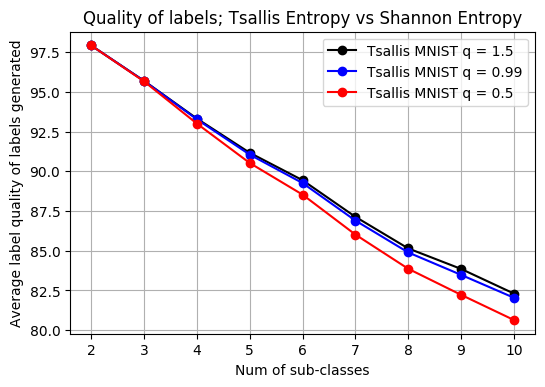

In [54]:
plt.figure(dpi = 100)
plt.title("Quality of labels; Tsallis Entropy vs Shannon Entropy")
plt.plot([i for i in range(2, 11)], lqual_mnist1, marker = "o", color = "k", label = "Tsallis MNIST q = 1.5")
plt.plot([i for i in range(2, 11)], lqual_mnist2, marker = "o", color = "b", label = "Tsallis MNIST q = 0.99")
plt.plot([i for i in range(2, 11)], lqual_mnist3, marker = "o", color = "r", label = "Tsallis MNIST q = 0.5")
plt.xlabel("Num of sub-classes")
plt.ylabel("Average label quality of labels generated")	
plt.legend(loc = "best")
plt.grid(True)

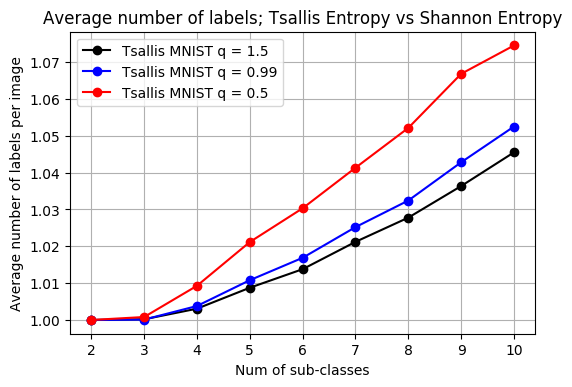

In [55]:
plt.figure(dpi = 100)
plt.title("Average number of labels; Tsallis Entropy vs Shannon Entropy")
plt.plot([i for i in range(2, 11)], lnum_mnist1, marker = "o", color = "k", label = "Tsallis MNIST q = 1.5")
plt.plot([i for i in range(2, 11)], lnum_mnist2, marker = "o", color = "b", label = "Tsallis MNIST q = 0.99")
plt.plot([i for i in range(2, 11)], lnum_mnist3, marker = "o", color = "r", label = "Tsallis MNIST q = 0.5")
plt.xlabel("Num of sub-classes")
plt.ylabel("Average number of labels per image")	
plt.legend(loc = "best")
plt.grid(True)

In [51]:
a = 1